# Bar plot
. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03
- https://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html
- https://towardsdatascience.com/how-to-group-yearly-data-by-periods-5199a1dba5db
- https://medium.com/mlearning-ai/all-8-types-of-time-series-classification-methods-2c8e4b323ea2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
#import time
#import datetime
# from pandas.plotting import register_matplotlib_converters
# register_matplotlib_converters()
import calendar as cal


### Use Pandas to import the data from "fcc-forum-pageviews.csv".
- Set the index to the date column & clean <= 2.5% and >= 97.5 %.

In [2]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True)

df = df.loc[(df['value'] > df['value'].quantile(0.025)) &
            (df['value'] < df['value'].quantile(0.975))]
#df

### Create a draw_bar_plot function that draws a bar chart:
- similar to "examples/Figure_2.png".
- It should show average daily page views for each month grouped by year.
- The legend should show month labels and have a title of Months.
- On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

In [3]:
# Extract year - month - date and add as new column
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day        # NOT NECESARY
df

,value,year,month,day
date,,,,
2016-05-19,19736,2016,5,19
2016-05-26,18060,2016,5,26
2016-05-27,19997,2016,5,27
2016-05-28,19044,2016,5,28
2016-05-29,20325,2016,5,29
...,...,...,...,...
2019-11-24,138875,2019,11,24
2019-11-29,171584,2019,11,29
2019-11-30,141161,2019,11,30


In [4]:
# df_S = df.stack()
# df_S.index
# # df_S

In [5]:
df_G = df.groupby(['year', 'month'])['value'].mean()
display(df_G)
print(type(df_G))
df_G.index

year  month
2016  5         19432.400000
      6         21875.105263
      7         24109.678571
      8         31049.193548
      9         41476.866667
      10        27398.322581
      11        40448.633333
      12        27832.419355
2017  1         32785.161290
      2         31113.071429
      3         29369.096774
      4         30878.733333
      5         34244.290323
      6         43577.500000
      7         65806.838710
      8         47712.451613
      9         47376.800000
      10        47438.709677
      11        57701.566667
      12        48420.580645
2018  1         58580.096774
      2         65679.000000
      3         62693.774194
      4         62350.833333
      5         56562.870968
      6         70117.000000
      7         63591.064516
      8         62831.612903
      9         65941.733333
      10       111378.142857
      11        78688.333333
      12        80047.483871
2019  1        102056.516129
      2        105968.357143
  

<class 'pandas.core.series.Series'>


MultiIndex([(2016,  5),
            (2016,  6),
            (2016,  7),
            (2016,  8),
            (2016,  9),
            (2016, 10),
            (2016, 11),
            (2016, 12),
            (2017,  1),
            (2017,  2),
            (2017,  3),
            (2017,  4),
            (2017,  5),
            (2017,  6),
            (2017,  7),
            (2017,  8),
            (2017,  9),
            (2017, 10),
            (2017, 11),
            (2017, 12),
            (2018,  1),
            (2018,  2),
            (2018,  3),
            (2018,  4),
            (2018,  5),
            (2018,  6),
            (2018,  7),
            (2018,  8),
            (2018,  9),
            (2018, 10),
            (2018, 11),
            (2018, 12),
            (2019,  1),
            (2019,  2),
            (2019,  3),
            (2019,  4),
            (2019,  5),
            (2019,  6),
            (2019,  7),
            (2019,  8),
            (2019,  9),
            (201

In [6]:
df_Gu = df_G.unstack()
display(df_Gu)
print(type(df_Gu))
df_Gu.index

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


<class 'pandas.core.frame.DataFrame'>


Int64Index([2016, 2017, 2018, 2019], dtype='int64', name='year')

In [7]:
#df_Gu.info()
df_Gu.columns

# need a dict to rename columns at once
nc_0 = {i: cal.month_name[i] for i in range(1, 13)}
print(nc_0)

nc = {num: cal.month_name[num] for num in df_Gu.columns}
print(nc)

# nc = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
# df_Gu.rename(columns=nc, inplace=True)
df_Gunstack_name = df_Gu.rename(columns= new_cols)

## BEST!! --> OTRA MANERA ¿'¿' aprende_py.pdf
df_Gunstack_n1 = df_Gu.rename(columns=lambda c: cal.month_name[c])

# # # months = ['Fanuary', 'Frebruary', 'March']
# # # for m in range(1, 4):
# # #     df_Gu.rename(m = months[m - 1])

df_Gunstack_n1


{1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
{1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}


month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


Text(0, 0.5, 'Average Page Views')

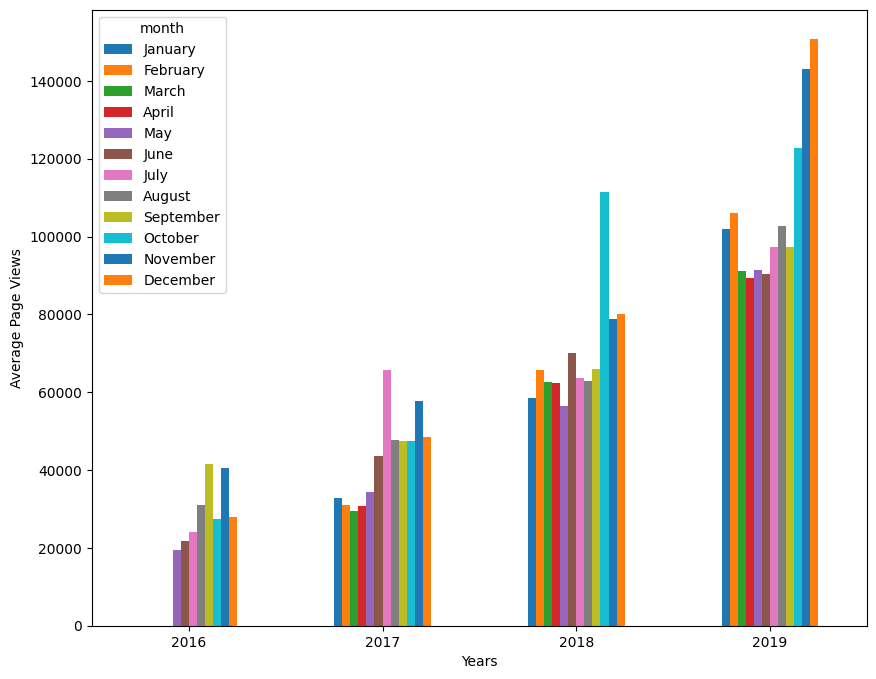

In [8]:
#df_Gu.plot.bar()

fig, axs = plt.subplots(figsize= (10, 8))
df_Gunstack_n1.plot(kind='bar', rot=0, ax=axs)
axs.set_xlabel('Years')
axs.set_ylabel('Average Page Views')



In [9]:
now = dt.datetime.now()
print(now, now.month)
dt_obj = dt.datetime.strptime('3', '%m')
month_name = dt_obj.strftime('%B')
print(month_name)

month_name1= cal.month_name[3]
print(month_name1)

NameError: name 'dt' is not defined

In [ ]:
fig, ax = plt.subplots(figsize= (10, 8))
ax.plot(kind='bar', data=df_Gu)

#### NICE to practice:
https://www.interviewqs.com/ddi-code-snippets/extract-month-year-pandas

In [ ]:
### --- aprende_py.pff
fig, ax = plt.subplots(figsize= (10, 8))

barw = 0.05
#x = np.arange(df_Gu.index.size)
x = df_Gu.index

jan = ax.bar(x - barw, df_Gu[1], barw, label='jan')
feb = ax.bar(x, df_Gu[2], barw, label='feb')
mar = ax.bar(x + barw, df_Gu[3], barw, label='jan')

ax.legend()

# # Aprende Python
# >>> fig, ax = plt.subplots(figsize=(8, 5), dpi=100) # 800x500 px
# >>> bar_width = 0.30
# >>> x = np.arange(df_best.index.size)
# >>> golden_medals = ax.bar(x - bar_width, df_best[ Gold ],
# ... bar_width, label= Oro , color= #ffd700 )
# >>> silver_medals = ax.bar(x, df_best[ Silver ],
# ... bar_width, label= Plata , color= #aaa9ad )
# >>> bronze_medals = ax.bar(x + bar_width, df_best[ Bronze ],
# ... bar_width, label= Bronce , color= #cd7f32 )
# >>> ax.set_xticks(x)
# >>> ax.set_xticklabels(df_best.index, rotation=90)
# >>> ax.legend()
# >>> # Etiquetas en barras
# >>> ax.bar_label(golden_medals, padding=3)
# >>> ax.bar_label(silver_medals, padding=3)
# >>> ax.bar_label(bronze_medals, padding=3)
# >>> ax.spines[ right ].set_visible(False) # ocultar borde derecho
# >>> ax.spines[ top ].set_visible(False) # ocultar borde superior
# >>> fig.tight_layout() # ajustar elementos al tamaño de la figura
# >>> fig


In [ ]:
# # JM - try
# fig, ax = plt.subplots(figsize=(12, 6))
# ax = sns.heatmap(df_Gu, cmap='Blues')

# Other Way TOTAL - JM resume

Text(0, 0.5, 'Average Page Views')

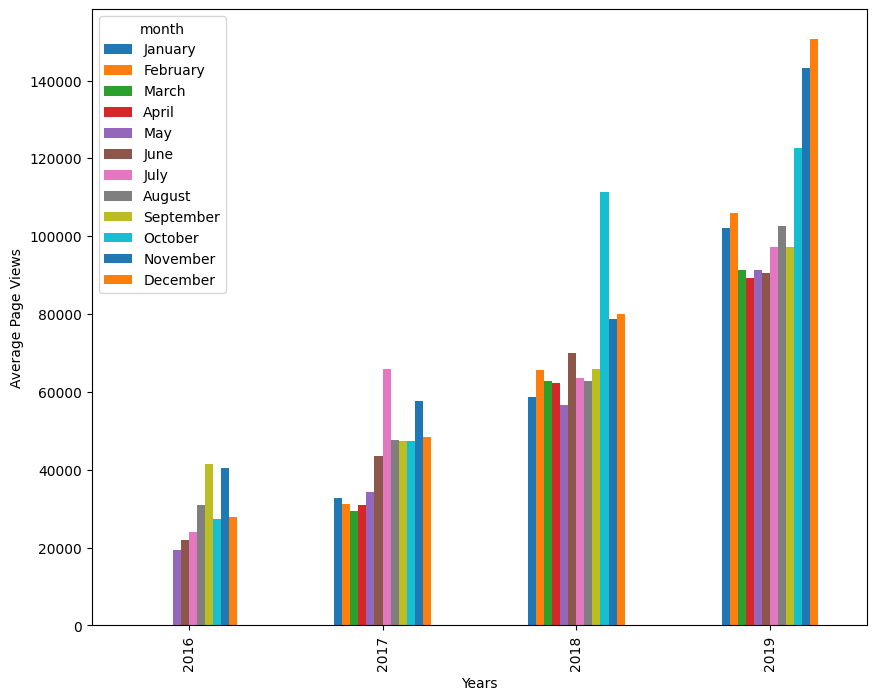

In [14]:
# Copy and modify data for monthly bar plot
df_bar = df.copy()
df['year'] = df.index.year 
df['month'] = df.index.month
df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()
# nc = {1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June',
#  7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'}
# df_Gu.rename(columns=nc, inplace=True)
df_bar.rename(columns=lambda c: cal.month_name[c], inplace=True)

# Draw bar plot
fig, axs = plt.subplots(figsize= (10, 8))
#df_bar.plot(kind='bar', rot=0, ax=axs)
df_bar.plot(kind='bar', ax=axs)
axs.set_xlabel('Years')
axs.set_ylabel('Average Page Views')


# Other Way TOTAL....

In [ ]:
### Copy(3)
df_bar = df.copy()
df_bar['year'] = pd.DatetimeIndex(df_bar.index).year
df_bar['month'] = pd.DatetimeIndex(df_bar.index).month
df_bar = df_bar.groupby(['year', 'month'])['value'].mean().unstack()
  
# Draw bar plot
fig = df_bar.plot.bar()
plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], title='Months')
plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.tight_layout()


# Other Way TOTAL - seaborn!!

In [ ]:
### sns_1 with precedence groupby
# Copy and modify data for monthly bar plot
df_bar = df.groupby(by=[df.index.year, df.index.month ]).mean()
df_bar.index.names=['Years','Months']
df_bar = df_bar.reset_index()
df_bar['Months'] = pd.to_datetime(df_bar['Months'], format='%m').dt.month_name()
df_bar = df_bar.rename(columns={"value": "Average Page Views"})

# Draw bar plot
fig, ax = plt.subplots(figsize=(8,6))
hue_order = ['January','February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
plot = sns.barplot(x=df_bar['Years'], y=df_bar['Average Page Views'], hue=df_bar['Months'],hue_order=hue_order ,palette="tab10")
sns.move_legend(plot , loc='upper left')

In [ ]:
### sns_0 with precedence groupby
# Copy and modify data for monthly bar plot
df_bar = df.copy()
df_bar.reset_index(inplace=True)
  
df_bar['year'] = pd.DatetimeIndex(df_bar['date']).year
df_bar['month'] = pd.DatetimeIndex(df_bar['date']).month_name()
  
df_avg_bar = pd.DataFrame(df_bar.groupby(['year', 'month'])['value'].mean().round(decimals = 2))
df_avg_bar.reset_index(inplace = True)

# Draw bar plot
fig, ax = plt.subplots(figsize=(10, 15))
sns.barplot(data = df_avg_bar, x = 'year', y = 'value', hue = 'month')
plt.xlabel('Years')
plt.ylabel('Average Page Views')
plt.legend(loc='upper left')
### DO NOT LIKE - BAD months ORDER ¿?

In [ ]:
fig, ax = plt.subplots(figsize= (20, 6))
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
#ax.set_xticks(ticks=[250, 500, 1000])
ax.plot(dfc, color='red')
#ax.get_xticklabels()

In [ ]:
fig, ax = plt.subplots(figsize=(10,5))
plt.plot(dfc.index, dfc['value'])
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

In [ ]:
#plt.plot(df_clean.index, 'value', data=df_clean)
fig = plt.figure(figsize=(20,6))
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
# ax.xaxis = 2017
plt.xlabel('date')
plt.ylabel(df_clean.value.name)
plt.xticks(pd.date_range(start="2016-07",end='2020-01', normalize=True, freq='6MS'))
plt.plot(df_clean)
#ax.get_xticklabels()

In [ ]:
title_label = 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'  
fig, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(data = dfc, legend=False)
ax.set_title(title_label)
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')

In [ ]:
fig, ax = plt.subplots(figsize=(14,4))
plt.plot(dfc.index, dfc['value'], linewidth=1, color='red')
plt.xticks(pd.date_range(start="2016-07",end='2020-01', normalize=True, freq='6MS'))
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

In [ ]:
df = pd.read_csv('fcc-forum-pageviews.csv', index_col='date', parse_dates=True)
df = df.query(
  'value <= value.quantile(0.975) & value >= value.quantile(0.025)')
fig, ax = plt.subplots(figsize=(20, 5))
ax.set_title('Daily freeCodeCamp Forum Page Views 5/2016-12/2019')
ax.set_xlabel('Date')
ax.set_ylabel('Page Views')
ax.plot(df, color='red')